In [5]:
import pandas as pd

# Correct file paths based on your VS Code structure
file_paths = [
    "DataSets/DataSets/plugs_detail.csv",
    "DataSets/DataSets/ports_detail.csv",
    "DataSets/DataSets/stations_detail.csv"
]

dataframes = {}

for path in file_paths:
    name = path.split("/")[-1].replace(".csv", "")
    df = pd.read_csv(path)
    dataframes[name] = df

    print(f"\n--- {name.upper()} ---")
    print("Shape:", df.shape)
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nSample Rows:\n", df.head(3))


C:\Users\ratho\AppData\Local\Temp\ipykernel_1492\2219813516.py:14: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)



--- PLUGS_DETAIL ---
Shape: (33265, 27)

Data Types:
 StationId                      int64
Code                           int64
IconUrl                       object
Level                          int64
Status                         int64
LastTimeUsed                  object
Network                        int64
NetworkName                   object
NetworkIconUrl                object
Count                          int64
PriceString                   object
ChargingRateUnit             float64
ChargingRateInfo              object
ChargingRate                 float64
ParkingRate                  float64
ParkingUnit                  float64
ParkingInfo                   object
Amp                           object
Kw                            object
Volt                          object
StatusTime                    object
LiveStatusLastUpdate          object
PlugPassportEnabled             bool
FlexFee                      float64
Name                          object
DetailedStatusInfo_S

C:\Users\ratho\AppData\Local\Temp\ipykernel_1492\3143924178.py:12: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  plugs_df = pd.read_csv(plugs_detail_path)


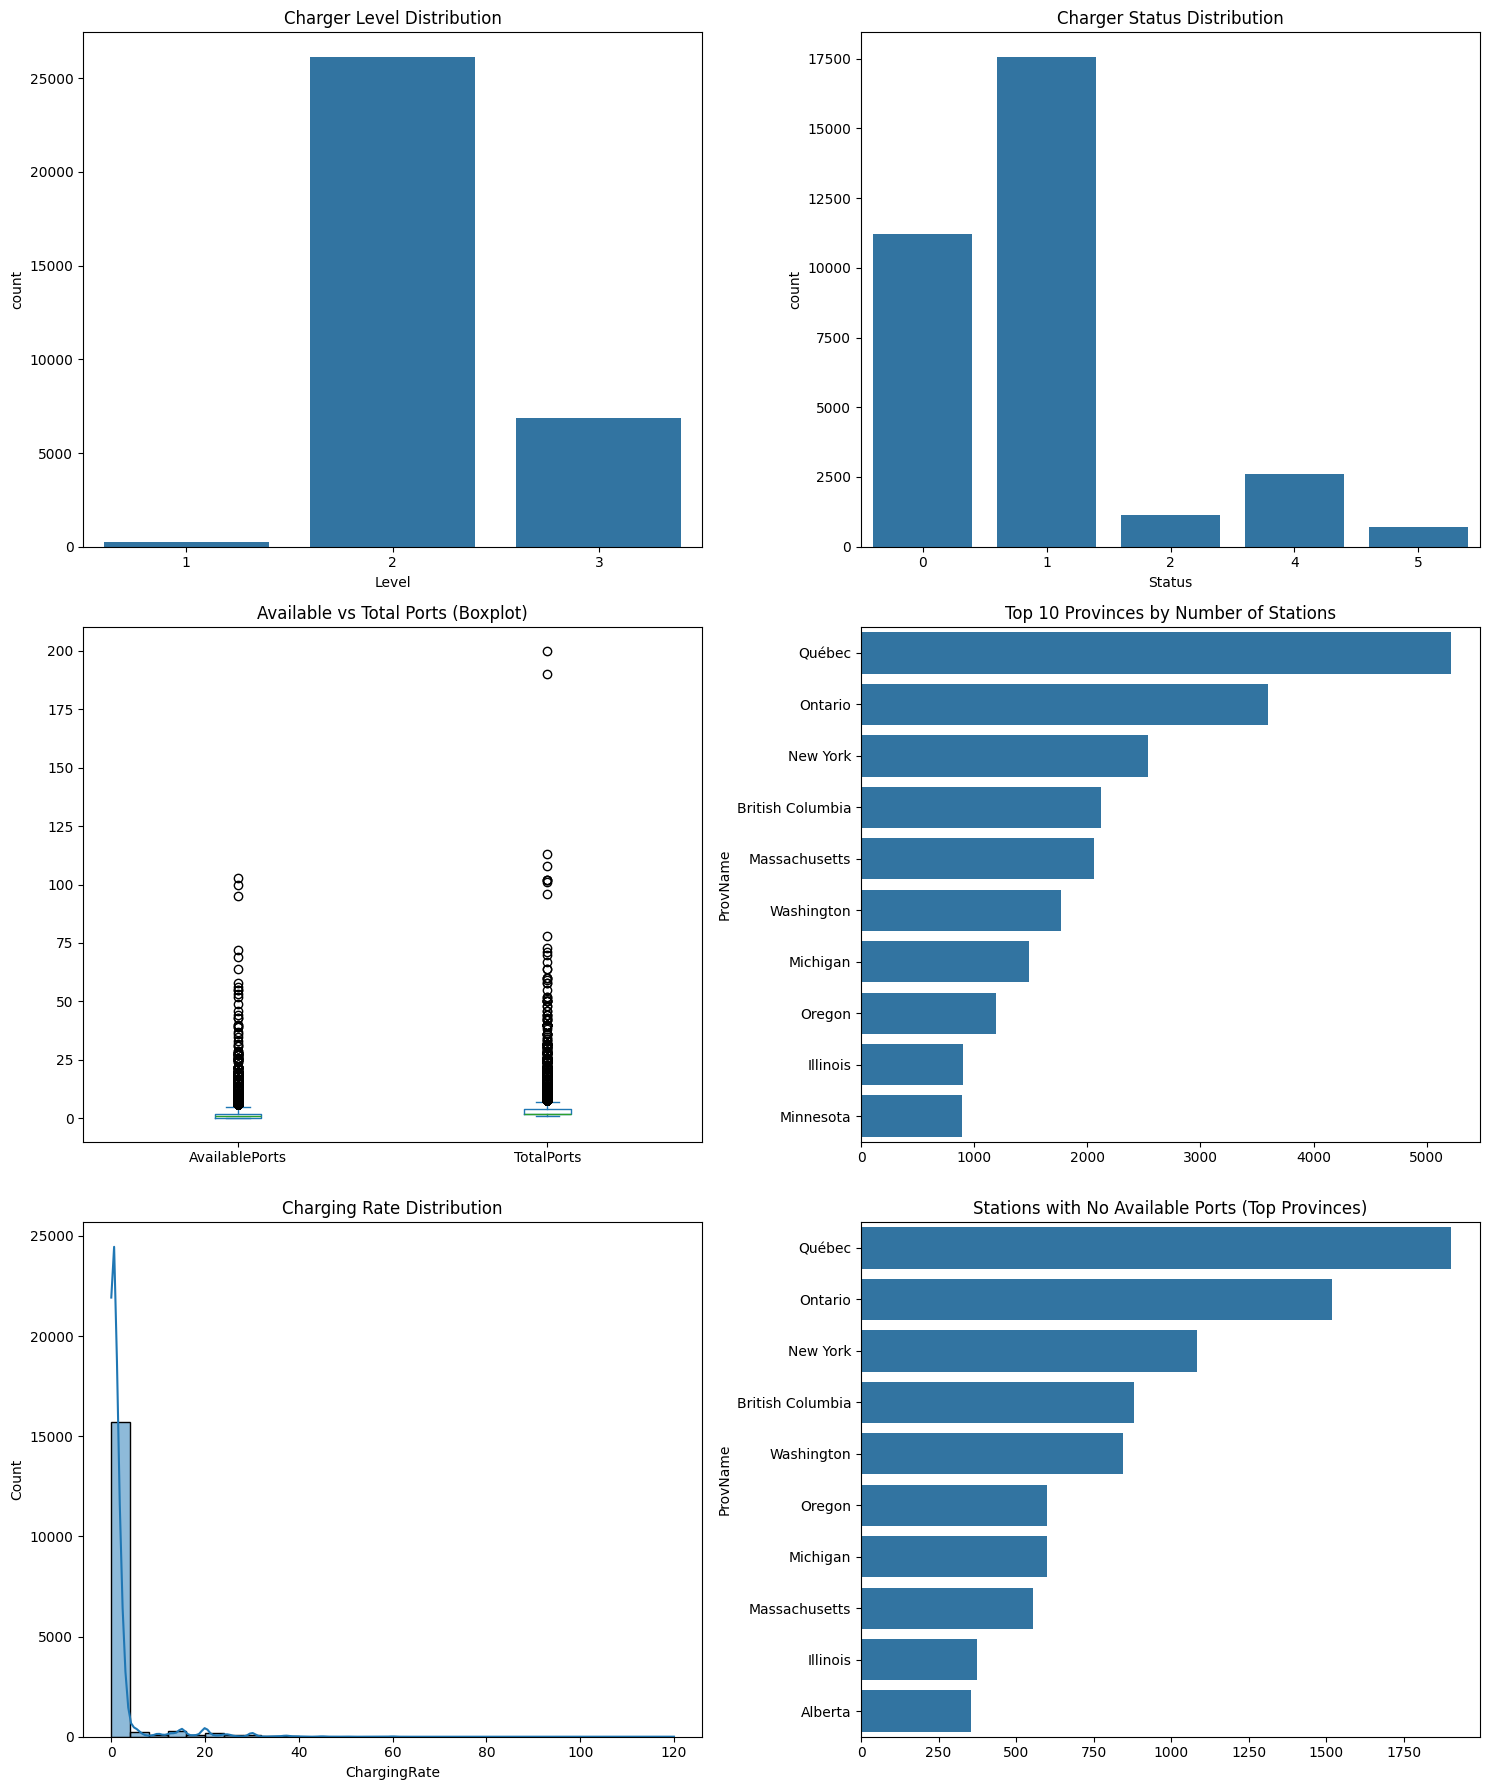

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the datasets (simulating the paths provided)
plugs_detail_path = "DataSets/DataSets/plugs_detail.csv"
ports_detail_path = "DataSets/DataSets/ports_detail.csv"
stations_detail_path = "DataSets/DataSets/stations_detail.csv"

# Read the data
plugs_df = pd.read_csv(plugs_detail_path)
ports_df = pd.read_csv(ports_detail_path)
stations_df = pd.read_csv(stations_detail_path)

# Basic EDA summaries
eda_summary = {
    "PLUGS_DETAIL": plugs_df.describe(include='all'),
    "PORTS_DETAIL": ports_df.describe(include='all'),
    "STATIONS_DETAIL": stations_df.describe(include='all')
}

# Key EDA Insights - Plots
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# 1. Distribution of Charger Levels
sns.countplot(data=plugs_df, x='Level', ax=axs[0, 0])
axs[0, 0].set_title('Charger Level Distribution')

# 2. Charger Status
sns.countplot(data=plugs_df, x='Status', ax=axs[0, 1])
axs[0, 1].set_title('Charger Status Distribution')

# 3. Available vs Total Ports (stations)
stations_df[['AvailablePorts', 'TotalPorts']].plot(kind='box', ax=axs[1, 0])
axs[1, 0].set_title('Available vs Total Ports (Boxplot)')

# 4. Ports per Province
top_provinces = stations_df['ProvName'].value_counts().head(10)
sns.barplot(x=top_provinces.values, y=top_provinces.index, ax=axs[1, 1])
axs[1, 1].set_title('Top 10 Provinces by Number of Stations')

# 5. Charging Rate Distribution
sns.histplot(plugs_df['ChargingRate'].dropna(), bins=30, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Charging Rate Distribution')

# 6. Stations with No Available Ports
no_ports = stations_df[stations_df['AvailablePorts'] == 0]['ProvName'].value_counts().head(10)
sns.barplot(x=no_ports.values, y=no_ports.index, ax=axs[2, 1])
axs[2, 1].set_title('Stations with No Available Ports (Top Provinces)')

plt.tight_layout()
plt.show()


C:\Users\ratho\AppData\Local\Temp\ipykernel_1492\1894485449.py:11: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  plugs_df = pd.read_csv(plugs_detail_path)


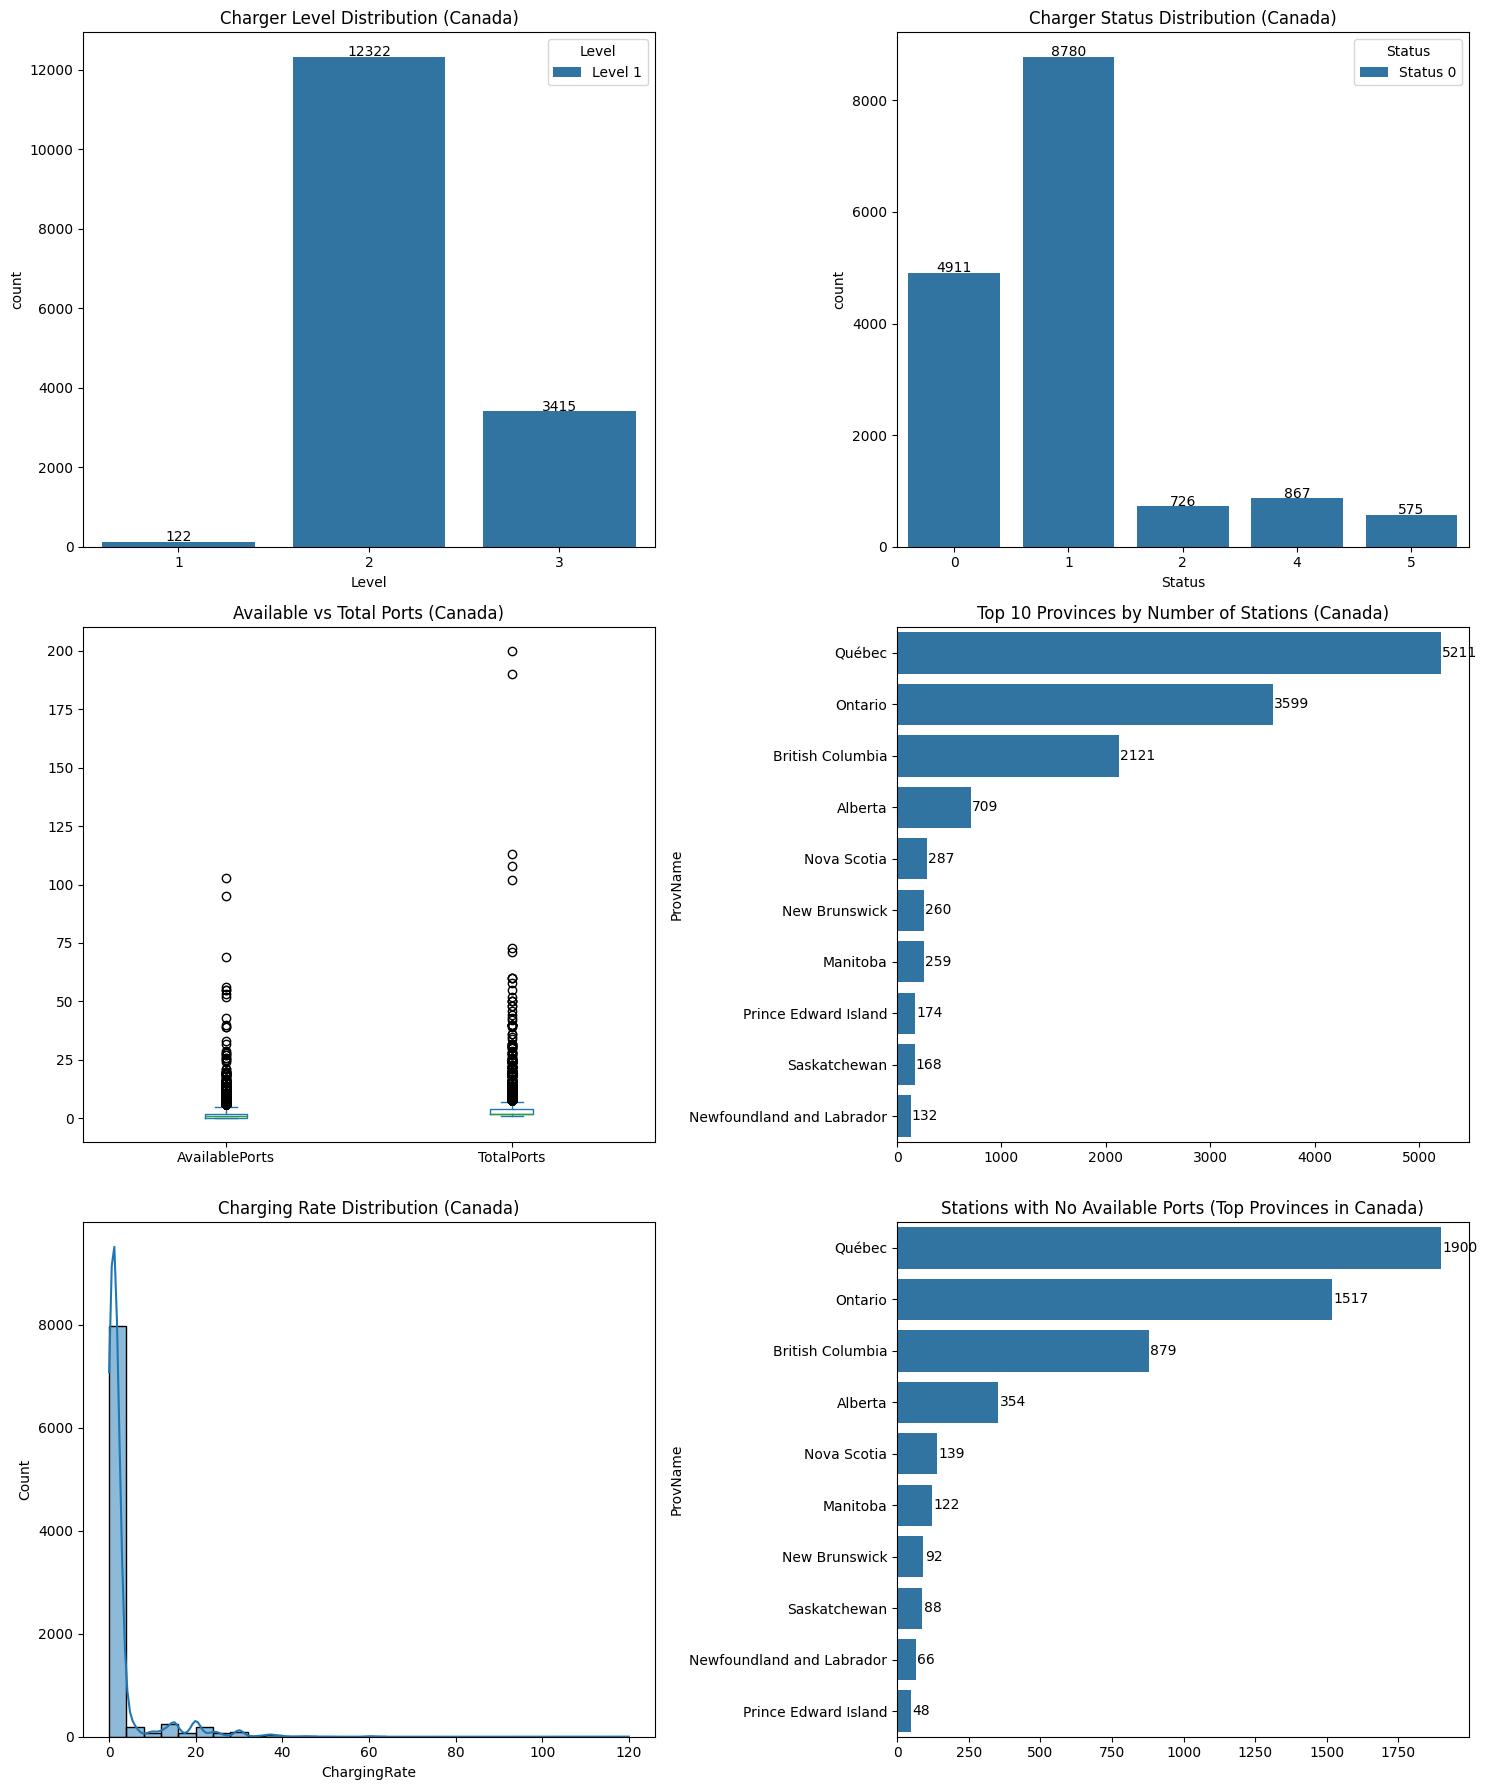

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
plugs_detail_path = "DataSets/DataSets/plugs_detail.csv"
ports_detail_path = "DataSets/DataSets/ports_detail.csv"
stations_detail_path = "DataSets/DataSets/stations_detail.csv"

# Read the data
plugs_df = pd.read_csv(plugs_detail_path)
ports_df = pd.read_csv(ports_detail_path)
stations_df = pd.read_csv(stations_detail_path)

# Filter only Canadian stations
stations_df = stations_df[stations_df['CountryName'].str.contains("Canada", na=False)]

# Merge plugs and stations on StationId for filtered EDA
plugs_df = plugs_df[plugs_df['StationId'].isin(stations_df['Id'])]
ports_df = ports_df[ports_df['StationId'].isin(stations_df['Id'])]

# Key EDA Insights - Plots
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# 1. Distribution of Charger Levels
level_counts = plugs_df['Level'].value_counts().sort_index()
sns.countplot(data=plugs_df, x='Level', ax=axs[0, 0])
for i, count in enumerate(level_counts):
    axs[0, 0].text(i, count + 10, str(count), ha='center')
axs[0, 0].set_title('Charger Level Distribution (Canada)')
axs[0, 0].legend(title='Level', labels=[f"Level {lvl}" for lvl in level_counts.index])

# 2. Charger Status
status_counts = plugs_df['Status'].value_counts().sort_index()
sns.countplot(data=plugs_df, x='Status', ax=axs[0, 1])
for i, count in enumerate(status_counts):
    axs[0, 1].text(i, count + 10, str(count), ha='center')
axs[0, 1].set_title('Charger Status Distribution (Canada)')
axs[0, 1].legend(title='Status', labels=[f"Status {s}" for s in status_counts.index])

# 3. Available vs Total Ports (Boxplot)
stations_df[['AvailablePorts', 'TotalPorts']].plot(kind='box', ax=axs[1, 0])
axs[1, 0].set_title('Available vs Total Ports (Canada)')

# 4. Ports per Province
top_provinces = stations_df['ProvName'].value_counts().head(10)
sns.barplot(x=top_provinces.values, y=top_provinces.index, ax=axs[1, 1])
for i, val in enumerate(top_provinces.values):
    axs[1, 1].text(val + 10, i, str(val), va='center')
axs[1, 1].set_title('Top 10 Provinces by Number of Stations (Canada)')

# 5. Charging Rate Distribution
sns.histplot(plugs_df['ChargingRate'].dropna(), bins=30, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Charging Rate Distribution (Canada)')

# 6. Stations with No Available Ports (Canada)
no_ports = stations_df[stations_df['AvailablePorts'] == 0]['ProvName'].value_counts().head(10)
sns.barplot(x=no_ports.values, y=no_ports.index, ax=axs[2, 1])
for i, val in enumerate(no_ports.values):
    axs[2, 1].text(val + 5, i, str(val), va='center')
axs[2, 1].set_title('Stations with No Available Ports (Top Provinces in Canada)')

plt.tight_layout()
plt.show()


C:\Users\ratho\AppData\Local\Temp\ipykernel_1492\4203502436.py:11: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  plugs_df = pd.read_csv(plugs_detail_path)


📊 Canada-Wide Port Summary
Total Ports: 42,052
Available Ports: 21,031
Not Available Ports: 21,021



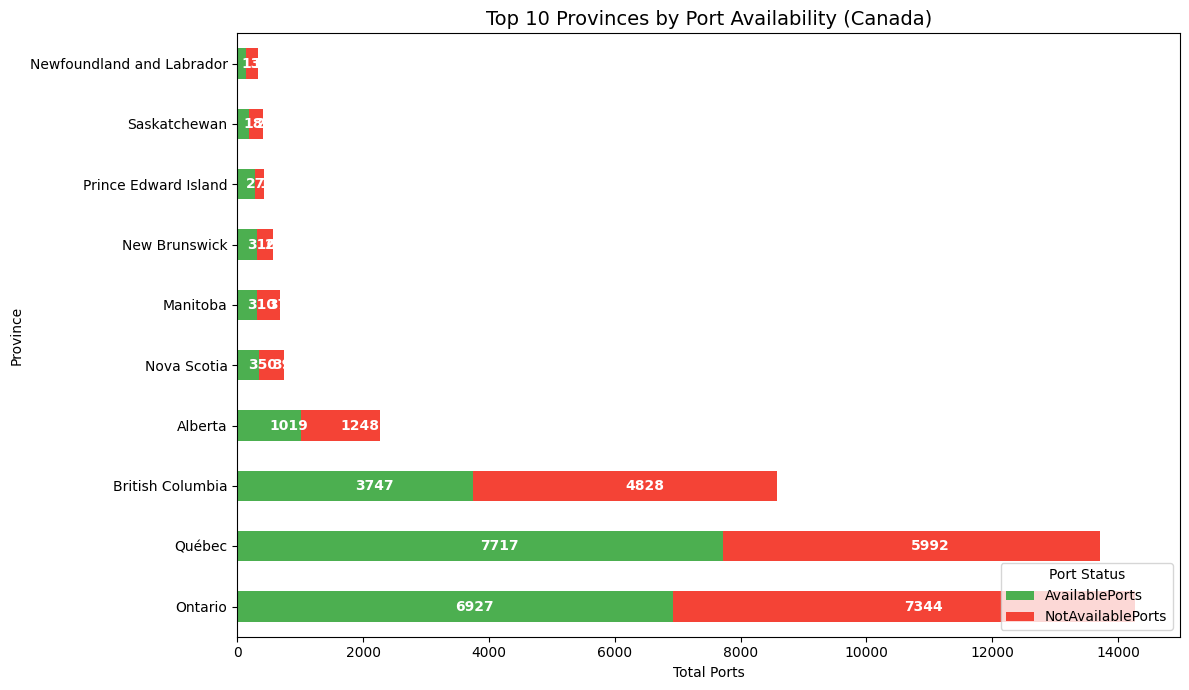

C:\Users\ratho\AppData\Local\Temp\ipykernel_1492\4203502436.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_counts.index, y=level_counts.values, palette="Set2", ax=axs[0, 0])
C:\Users\ratho\AppData\Local\Temp\ipykernel_1492\4203502436.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="Set3", ax=axs[0, 1])
C:\Users\ratho\AppData\Local\Temp\ipykernel_1492\4203502436.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_prov.values, y=top_prov.index, palette="Blues_d", 

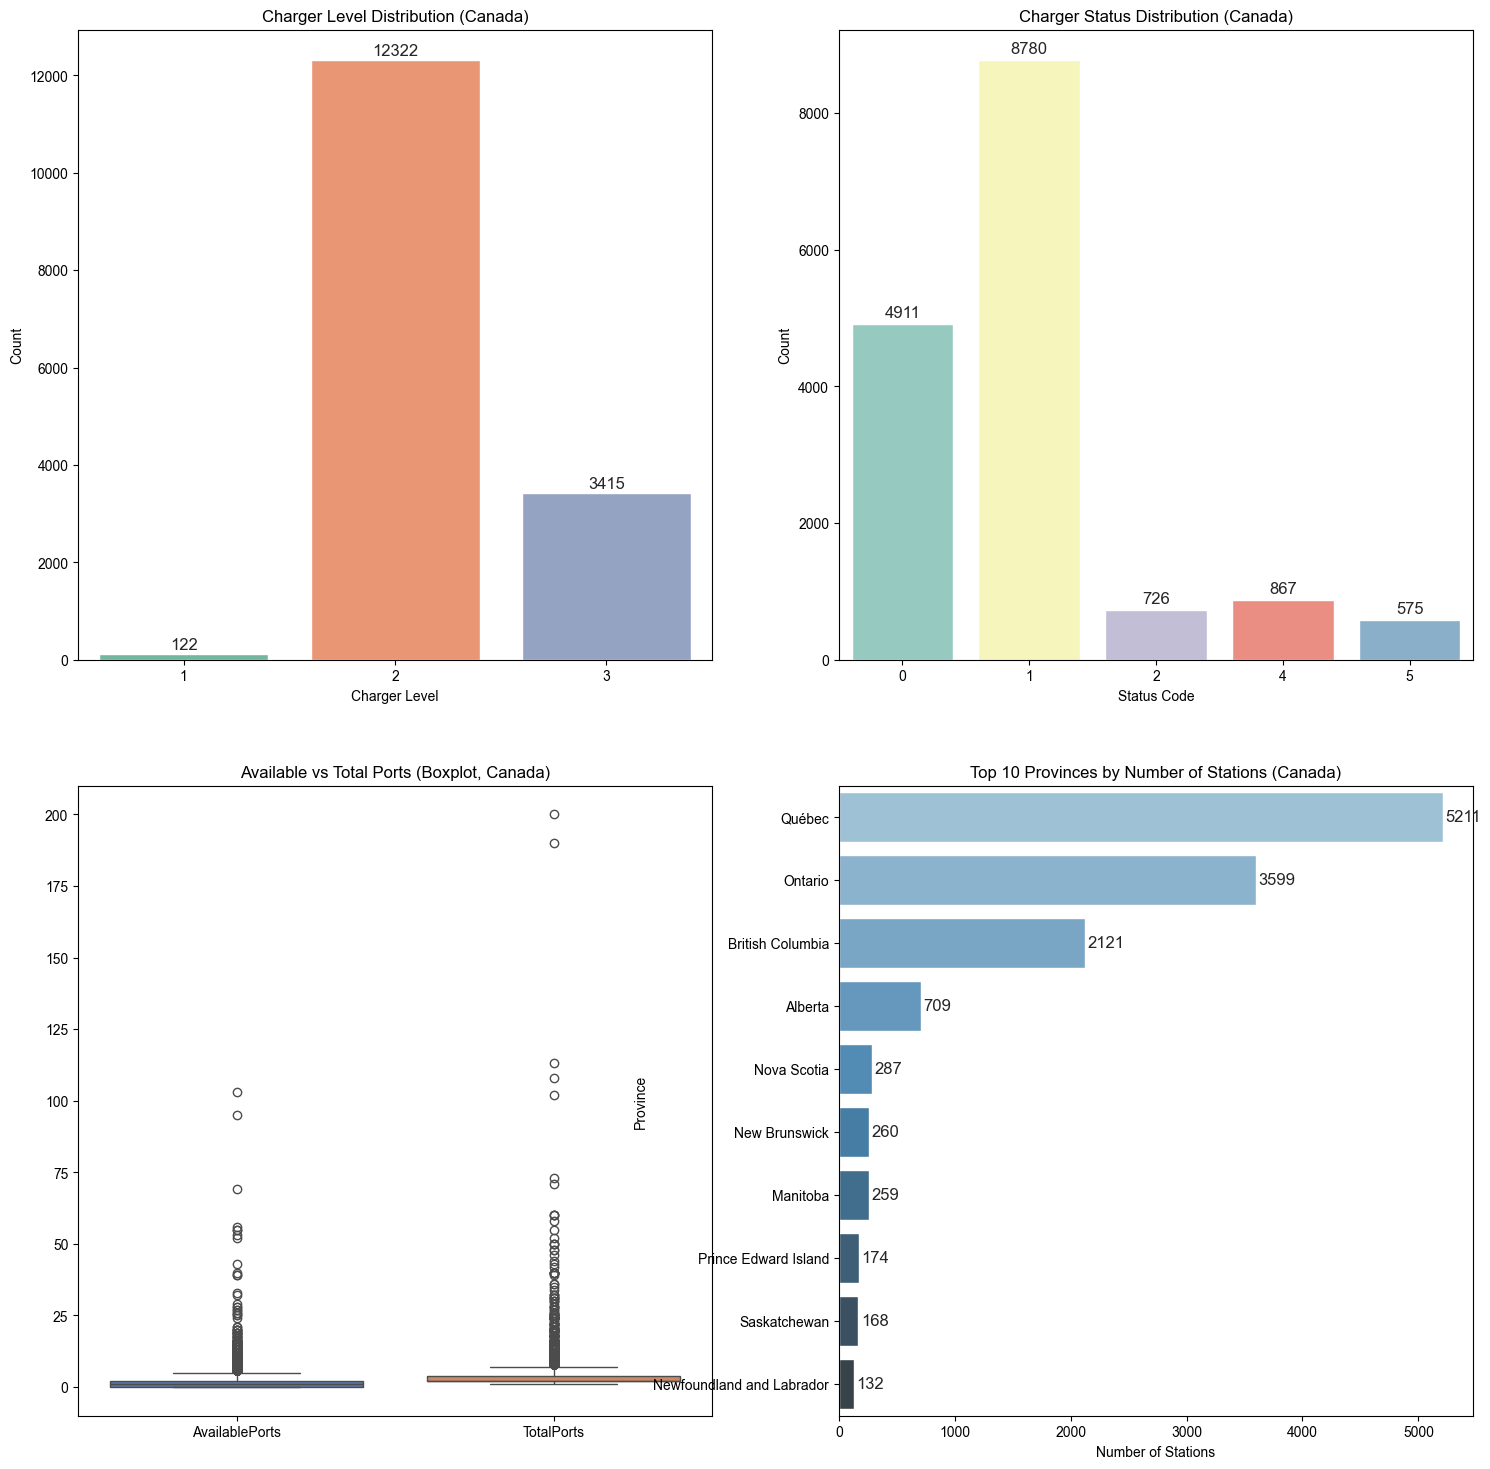

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reusing improved paths from earlier instruction
plugs_detail_path = "DataSets/DataSets/plugs_detail.csv"
ports_detail_path = "DataSets/DataSets/ports_detail.csv"
stations_detail_path = "DataSets/DataSets/stations_detail.csv"

# Read and filter for Canadian stations
plugs_df = pd.read_csv(plugs_detail_path)
ports_df = pd.read_csv(ports_detail_path)
stations_df = pd.read_csv(stations_detail_path)
stations_df = stations_df[stations_df['CountryName'].str.contains("Canada", na=False)]
plugs_df = plugs_df[plugs_df['StationId'].isin(stations_df['Id'])]
ports_df = ports_df[ports_df['StationId'].isin(stations_df['Id'])]


# Total ports summary
total_ports = stations_df['TotalPorts'].sum()
available_ports = stations_df['AvailablePorts'].sum()
not_available_ports = total_ports - available_ports

print("📊 Canada-Wide Port Summary")
print(f"Total Ports: {total_ports:,}")
print(f"Available Ports: {available_ports:,}")
print(f"Not Available Ports: {not_available_ports:,}\n")

# Province-wise summary
province_summary = stations_df.groupby("ProvName")[["AvailablePorts", "TotalPorts"]].sum()
province_summary["NotAvailablePorts"] = province_summary["TotalPorts"] - province_summary["AvailablePorts"]
province_summary_sorted = province_summary.sort_values(by="TotalPorts", ascending=False)

# Top 10 provinces by TotalPorts
top_10 = province_summary_sorted.head(10)

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))
top_10[['AvailablePorts', 'NotAvailablePorts']].plot(
    kind='barh',
    stacked=True,
    color=['#4CAF50', '#F44336'],
    ax=ax
)

# Titles and labels
ax.set_title('Top 10 Provinces by Port Availability (Canada)', fontsize=14)
ax.set_xlabel('Total Ports')
ax.set_ylabel('Province')
ax.legend(title='Port Status', loc='lower right')

# Show value labels
for i, (avail, not_avail) in enumerate(zip(top_10['AvailablePorts'], top_10['NotAvailablePorts'])):
    ax.text(avail / 2, i, f'{avail}', va='center', color='white', fontweight='bold')
    ax.text(avail + not_avail / 2, i, f'{not_avail}', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Begin improved visualizations
fig, axs = plt.subplots(2, 2, figsize=(18, 18))
sns.set(style="whitegrid")

# 1. Charger Level Distribution
level_counts = plugs_df['Level'].value_counts().sort_index()
sns.barplot(x=level_counts.index, y=level_counts.values, palette="Set2", ax=axs[0, 0])
axs[0, 0].set_title('Charger Level Distribution (Canada)')
axs[0, 0].set_xlabel("Charger Level")
axs[0, 0].set_ylabel("Count")
for i, val in enumerate(level_counts.values):
    axs[0, 0].text(i, val + 100, str(val), ha='center')

# 2. Charger Status Distribution
status_counts = plugs_df['Status'].value_counts().sort_index()
sns.barplot(x=status_counts.index, y=status_counts.values, palette="Set3", ax=axs[0, 1])
axs[0, 1].set_title('Charger Status Distribution (Canada)')
axs[0, 1].set_xlabel("Status Code")
axs[0, 1].set_ylabel("Count")
for i, val in enumerate(status_counts.values):
    axs[0, 1].text(i, val + 100, str(val), ha='center')

# 3. Available vs Total Ports
sns.boxplot(data=stations_df[['AvailablePorts', 'TotalPorts']], ax=axs[1, 0])
axs[1, 0].set_title('Available vs Total Ports (Boxplot, Canada)')

# 4. Top 10 Provinces by Number of Stations
top_prov = stations_df['ProvName'].value_counts().head(10)
sns.barplot(x=top_prov.values, y=top_prov.index, palette="Blues_d", ax=axs[1, 1])
axs[1, 1].set_title('Top 10 Provinces by Number of Stations (Canada)')
axs[1, 1].set_xlabel("Number of Stations")
axs[1, 1].set_ylabel("Province")
for i, val in enumerate(top_prov.values):
    axs[1, 1].text(val + 20, i, str(val), va='center')





1. Ontario and Québec lead in total EV ports, but also face the highest number of unavailable ports.

2. Level 2 chargers dominate the network; Level 1 chargers are rare.

3. Rural and smaller provinces have significantly fewer stations and ports, indicating a regional infrastructure gap.

C:\Users\ratho\AppData\Local\Temp\ipykernel_1492\2088007151.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("DataSets/DataSets/20100025.csv")
C:\Users\ratho\AppData\Local\Temp\ipykernel_1492\2088007151.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_zev_summary.values, y=geo_zev_summary.index, palette="magma")


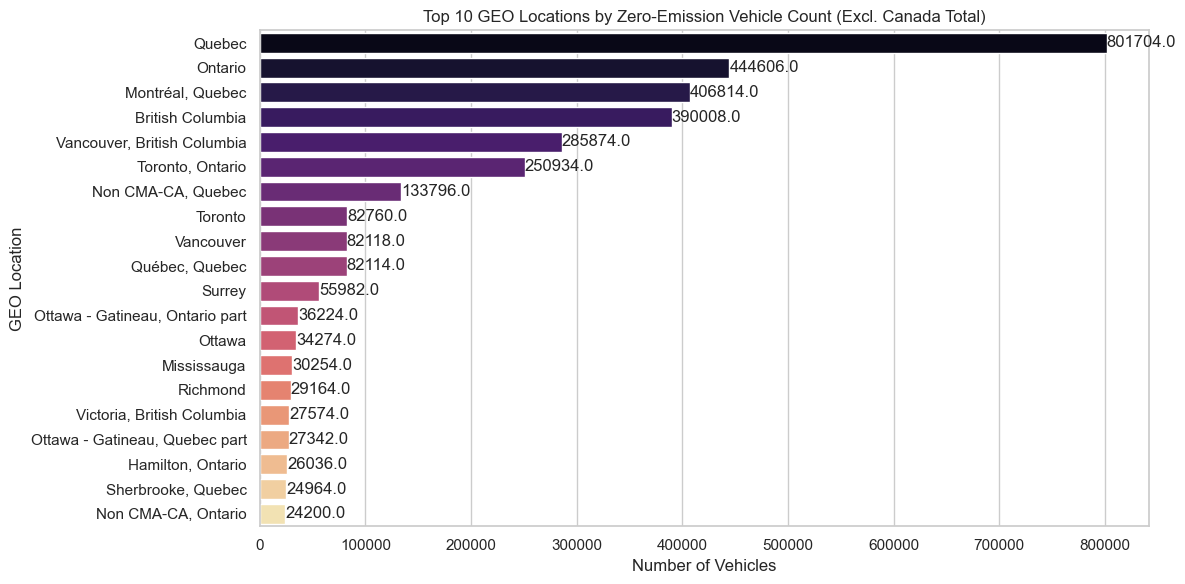

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("DataSets/DataSets/20100025.csv")
  

# Filter for zero-emission vehicles and exclude "Canada"
zev_df = df[
    (df["Fuel type"] == "All zero-emission vehicles") &
    (df["GEO"] != "Canada")
]

# Group by GEO and sum vehicle counts
geo_zev_summary = zev_df.groupby("GEO")["VALUE"].sum().sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=geo_zev_summary.values, y=geo_zev_summary.index, palette="magma")
plt.title("Top 10 GEO Locations by Zero-Emission Vehicle Count (Excl. Canada Total)")
plt.xlabel("Number of Vehicles")
plt.ylabel("GEO Location")
for i, val in enumerate(geo_zev_summary.values):
    plt.text(val + 30, i, str(val), va='center')
plt.tight_layout()
plt.show()
